# State of Maryland Annual Salary 2019
I analyzed annual salaries for state of Maryland employees for the year 2019. I focused on UMBC and UMCP(College Park) and compared their statistics between each other. Then I compared 2012 and 2019 for both UMBC and UMCP and checked if they have increase or decrease in 7 years. 

In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

data = pd.read_csv(r'/content/cy2019-md.csv')
data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,first_name,middle_initial,last_name,suffix,system,agency,organization,subtitle,class_code,annual_salary,pay_rate,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings,term_date
0,JOHN,C,POLIKS,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,8096,71000.00,A,70000,14000,500,85000,NaN
1,CARL,NaN,CHAMBERLIN,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,515,96000.00,A,93000,0,500,94000,NaN
2,JOSEPHINE,K,OBONYO,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,4849,73000.00,A,69000,0,2800,71000,NaN
3,LORI,J,MCFARLIN,NaN,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,7480,73000.00,A,70000,1000,2200,74000,NaN
4,ELWOOD,D,HALL,JR,RG,290201,DEPARTMENT OF TRANSPORTATION,290201,7896,52000.00,A,51000,18000,1800,70000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174992,EDDIE,L,JOHNSON,NaN,CT,500216,REGISTER OF WILLS,NaN,8990,18.51,H,19000,0,0,19000,NaN
174993,JAMES,NaN,JENNINGS,NaN,CT,500216,REGISTER OF WILLS,NaN,8990,0.00,H,7000,0,0,7000,2019-06-30T00:00:00Z
174994,EDNA,M,BLUE,NaN,CT,500220,REGISTER OF WILLS,NaN,9702,18.39,H,12000,0,200,12000,NaN
174995,CAROLE,NaN,ABRUZZESE,NaN,CT,500220,REGISTER OF WILLS,NaN,9702,18.39,H,8000,0,100,8000,NaN


In [118]:
data.shape

(174997, 16)

In [119]:
# Getting what kind of data we have in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174997 entries, 0 to 174996
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_name          174993 non-null  object 
 1   middle_initial      135796 non-null  object 
 2   last_name           174989 non-null  object 
 3   suffix              3681 non-null    object 
 4   system              174997 non-null  object 
 5   agency              174997 non-null  int64  
 6   organization        174997 non-null  object 
 7   subtitle            99305 non-null   object 
 8   class_code          174997 non-null  int64  
 9   annual_salary       174997 non-null  float64
 10  pay_rate            174997 non-null  object 
 11  regular_earnings    174997 non-null  int64  
 12  overtime_earnings   174997 non-null  int64  
 13  other_earnings      174997 non-null  int64  
 14  ytd_gross_earnings  174997 non-null  int64  
 15  term_date           42634 non-null

In [120]:
# getting certain columns from the first dataframe to make it a cleaner dataframe.
# cleansing 0 value ytd earnings from 'a' dataframe

a = pd.read_csv(r'/content/cy2019-md.csv', usecols=['first_name', 'last_name', 'agency', 'organization', 'annual_salary','ytd_gross_earnings'])



In [121]:
# cleansing 0 value ytd earnings from 'a' dataframe

a = a[a["ytd_gross_earnings"] != 0]
a

,first_name,last_name,agency,organization,annual_salary,ytd_gross_earnings
0,JOHN,POLIKS,290201,DEPARTMENT OF TRANSPORTATION,71000.00,85000
1,CARL,CHAMBERLIN,290201,DEPARTMENT OF TRANSPORTATION,96000.00,94000
2,JOSEPHINE,OBONYO,290201,DEPARTMENT OF TRANSPORTATION,73000.00,71000
3,LORI,MCFARLIN,290201,DEPARTMENT OF TRANSPORTATION,73000.00,74000
4,ELWOOD,HALL,290201,DEPARTMENT OF TRANSPORTATION,52000.00,70000
...,...,...,...,...,...,...
174992,EDDIE,JOHNSON,500216,REGISTER OF WILLS,18.51,19000
174993,JAMES,JENNINGS,500216,REGISTER OF WILLS,0.00,7000
174994,EDNA,BLUE,500220,REGISTER OF WILLS,18.39,12000
174995,CAROLE,ABRUZZESE,500220,REGISTER OF WILLS,18.39,8000


In [122]:
# how many different organization? 
clean_list = []
for i in a['organization']: 
    if i not in clean_list: 
        clean_list.append(i)
print(clean_list)
len(clean_list)

['DEPARTMENT OF TRANSPORTATION', 'GENERAL ASSEMBLY OF MARYLAND', 'JUDICIARY', 'OFFICE OF THE PUBLIC DEFENDER', 'OFFICE OF THE ATTORNEY GENERAL', 'OFFICE OF STATE PROSECUTOR', 'MARYLAND TAX COURT', "WORKERS' COMPENSATION COM", 'PUBLIC SERVICE COMMISSION', "OFFICE OF PEOPLE'S COUNSEL", 'SUBSEQUENT INJURY FUND', "MD UNINSURED EMPLOYERS' FUND", 'EXECUTIVE DEPARTMENT', 'MD STADIUM AUTHORITY', 'EXECUTIVE DEPT', 'SECRETARY OF STATE', 'OFFICE ON AGING', 'STATE ARCHIVES', 'OFFICE OF ADMNSTRTV HEARINGS', 'MD ENERGY ADMINISTRATION', "GOVERNOR'S OFFICE FOR CHILDREN", "HISTORIC ST. MARY'S CITY COMM", 'BOARD OF PUBLIC WORKS', 'MILITARY DEPARTMENT', 'ST ADM BOARD OF ELECTION LAWS', 'MD COMMISSION ON CIVIL RIGHTS', 'MD FOOD CENTER AUTHORITY', 'MD DEPT OF VETERANS AFFAIRS', 'CANAL PLACE PRESERV & DEV AUTH', 'MD HEALTH BENEFIT EXCHANGE', 'MARYLAND OFFICE OF PLANNING', 'MARYLAND INSURANCE ADMIN', 'MD INS FOR EMERG MED SERV SYS', 'COMPTROLLER OF MARYLAND', 'STATE TREASURER', 'DEPT OF ASSESSMENTS & TAXATIO

75

count    1.447330e+05
mean     4.381643e+04
std      4.620009e+04
min      1.000000e+03
25%      8.000000e+03
50%      3.600000e+04
75%      6.400000e+04
max      3.047000e+06
Name: ytd_gross_earnings, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


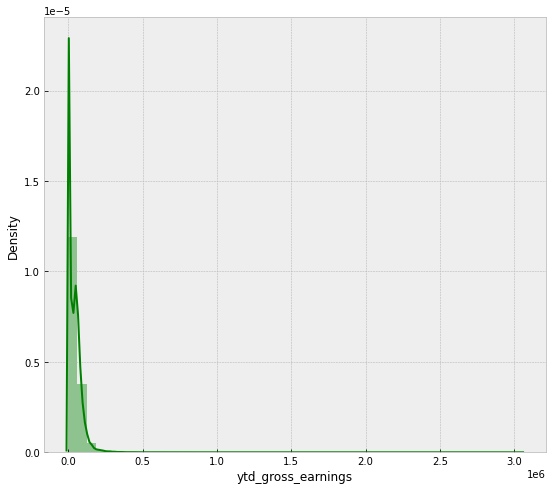

In [123]:
print(a['ytd_gross_earnings'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(a['ytd_gross_earnings'], color='g');

In [124]:
# removing data which are over $1M from ytd_gross_earnings column
# showing stats again
a = a[a["ytd_gross_earnings"] < 1000000]
a["ytd_gross_earnings"].describe()


count    144729.000000
mean      43762.874061
std       44848.883425
min        1000.000000
25%        8000.000000
50%       36000.000000
75%       64000.000000
max      949000.000000
Name: ytd_gross_earnings, dtype: float64

## Organization Names:
- UMBC (360231)
- UNIVERSITY OF MARYLAND COLLEGE PARK (360222)


In [184]:
# separating employees by their organization(agency code)

def separate_organization(agency_code):
    department_data = pd.DataFrame()
    department_data = a[a['agency'] == agency_code]
    return department_data


### Data for UMBC(360231)

In [128]:
separate_organization(360231)

,first_name,last_name,agency,organization,annual_salary,ytd_gross_earnings
123086,OLEG,FIRSIN,360231,UNIVERSITY OF MARYLAND,100000.0,105000
123087,B,RABIN,360231,UNIVERSITY OF MARYLAND,141000.0,138000
123088,MD TOUHIDUL,ISLAM,360231,UNIVERSITY OF MARYLAND,32000.0,10000
123089,RUCHITA,PARAB,360231,UNIVERSITY OF MARYLAND,0.0,6000
123090,SURBHI,LIPKIN-MOORE,360231,UNIVERSITY OF MARYLAND,18000.0,10000
...,...,...,...,...,...,...
131941,REETAM,MAJUMDER,360231,UNIVERSITY OF MARYLAND,18000.0,27000
131942,JUANITA,BOTONERO-MURCIA,360231,UNIVERSITY OF MARYLAND,0.0,2000
131943,XIAOFANG,XUE,360231,UNIVERSITY OF MARYLAND,22000.0,21000
131945,IOANNIS,BOUTSIKAS,360231,UNIVERSITY OF MARYLAND,22000.0,19000


In [223]:
umbc_2019 = separate_organization(360231).iloc[:, 3:].describe() # getting data for UMBC
umbc_2019

,annual_salary,ytd_gross_earnings
count,6514.000000,6514.000000
mean,27700.491250,30977.279705
std,43320.692847,42290.468737
min,0.000000,1000.000000
25%,0.000000,3000.000000
50%,0.000000,11000.000000
75%,48750.000000,47000.000000
max,538000.000000,574000.000000


In [ ]:
separate_organization(360231).iloc[:, 3:].hist(figsize=(16, 20))

### Data for UMCP(360222)

In [169]:
separate_organization(360222)

,first_name,last_name,agency,organization,annual_salary,ytd_gross_earnings
78723,SALEHA,WAQAR,360222,UNIVERSITY OF MARYLAND,9000.0,9000
78724,PRANAV,KULKARNI,360222,UNIVERSITY OF MARYLAND,0.0,12000
78725,DARSH,AJMERA,360222,UNIVERSITY OF MARYLAND,0.0,11000
78726,RODRIGO,HERESI,360222,UNIVERSITY OF MARYLAND,0.0,14000
78727,ROHIT,MALLIDI,360222,UNIVERSITY OF MARYLAND,0.0,1000
...,...,...,...,...,...,...
114324,SOYEON,JEONG,360222,UNIVERSITY OF MARYLAND,9000.0,4000
114325,ZIJIAN,WANG,360222,UNIVERSITY OF MARYLAND,0.0,2000
114326,OLUWAJOMILOJ,AJAYI,360222,UNIVERSITY OF MARYLAND,0.0,5000
114327,PRIYANKA,GANDHI,360222,UNIVERSITY OF MARYLAND,0.0,2000


In [172]:
separate_organization(360222).iloc[:, 3:].describe() # getting data for UMCP

,annual_salary,ytd_gross_earnings
count,29736.000000,29736.000000
mean,31634.853376,34947.302932
std,49897.735419,49881.488076
min,0.000000,1000.000000
25%,0.000000,4000.000000
50%,0.000000,13000.000000
75%,51000.000000,50000.000000
max,864000.000000,860000.000000


In [ ]:
separate_organization(360222).iloc[:, 3:].hist(figsize=(16, 20))

### MEAN COMPARISON for UMBC and UMCP

30977.279705250232
34947.30293247243


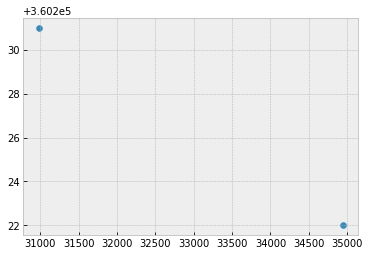

In [179]:
print(separate_organization(360231)['ytd_gross_earnings'].mean())
print(separate_organization(360222)['ytd_gross_earnings'].mean())

ids = [360231, 360222]
tmp = [separate_organization(i)["ytd_gross_earnings"].mean() for i in ids]

plt.scatter(tmp, ids)

# State of Maryland Annual Salary 2012

In [195]:
df = pd.read_csv(r'/content/cy2012-md.csv')
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sheet,first_name,last_name,suffix,agency,organization,subtitle,class_code,annual_salary,pay_rate,system,hire_date,regular_earnings,overtime_earnings,other_earnings,ytd_gross_earnings
0,RG 2012 210101 to 401201,NEIL,BUTLER,,210101,GENERAL ASSEMBLY OF MARYLAND,210101,8999,54000,A,RG,2011-01-12,30000,0.0,0,30000
1,RG 2012 210101 to 401201,KATHRYN,SZELIGA,,210101,GENERAL ASSEMBLY OF MARYLAND,210101,8999,44000,A,RG,2011-01-01,44000,0.0,1000,44000
2,RG 2012 210101 to 401201,SARA,FIDLER,,210101,GENERAL ASSEMBLY OF MARYLAND,210101,8999,86000,A,RG,2001-09-11,86000,0.0,0,86000
3,RG 2012 210101 to 401201,JOSHUA,SHNIDER,,210101,GENERAL ASSEMBLY OF MARYLAND,210101,8999,41000,A,RG,2011-01-10,26000,0.0,0,26000
4,RG 2012 210101 to 401201,TAMARA,SIMMONS,,210101,GENERAL ASSEMBLY OF MARYLAND,210101,8999,31000,A,RG,2007-04-18,30000,3000.0,0,33000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135722,2012,PAUL,WARD,,360236,UNIVERSITY OF MARYLAND,360236-USMO,1212,36000,A,UM,2002-01-28,0,0.0,36000,36000
135723,2012,GREGG,YELDELL,,360236,UNIVERSITY OF MARYLAND,360236-USMO,1212,73000,A,UM,2009-09-21,0,0.0,73000,73000
135724,2012,ZAKIYA,SMITH LEE,,360236,UNIVERSITY OF MARYLAND,360236-USMO,1212,63000,A,UM,2011-07-05,0,0.0,63000,63000
135725,2012,PAUL,STACKPOLE,,360236,UNIVERSITY OF MARYLAND,360236-USMO,1212,94000,A,UM,2003-01-21,0,0.0,93000,93000


In [196]:
df.shape

(135727, 16)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135727 entries, 0 to 135726
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   sheet               135727 non-null  object 
 1   first_name          135725 non-null  object 
 2   last_name           135727 non-null  object 
 3   suffix              109808 non-null  object 
 4   agency              135727 non-null  int64  
 5   organization        135727 non-null  object 
 6   subtitle            135727 non-null  object 
 7   class_code          135727 non-null  int64  
 8   annual_salary       135727 non-null  int64  
 9   pay_rate            135727 non-null  object 
 10  system              135727 non-null  object 
 11  hire_date           135727 non-null  object 
 12  regular_earnings    135727 non-null  int64  
 13  overtime_earnings   135726 non-null  float64
 14  other_earnings      135727 non-null  int64  
 15  ytd_gross_earnings  135727 non-nul

In [198]:
b = pd.read_csv(r'/content/cy2012-md.csv', usecols=['first_name', 'last_name', 'agency', 'organization', 'annual_salary','ytd_gross_earnings'])
b

,first_name,last_name,agency,organization,annual_salary,ytd_gross_earnings
0,NEIL,BUTLER,210101,GENERAL ASSEMBLY OF MARYLAND,54000,30000
1,KATHRYN,SZELIGA,210101,GENERAL ASSEMBLY OF MARYLAND,44000,44000
2,SARA,FIDLER,210101,GENERAL ASSEMBLY OF MARYLAND,86000,86000
3,JOSHUA,SHNIDER,210101,GENERAL ASSEMBLY OF MARYLAND,41000,26000
4,TAMARA,SIMMONS,210101,GENERAL ASSEMBLY OF MARYLAND,31000,33000
...,...,...,...,...,...,...
135722,PAUL,WARD,360236,UNIVERSITY OF MARYLAND,36000,36000
135723,GREGG,YELDELL,360236,UNIVERSITY OF MARYLAND,73000,73000
135724,ZAKIYA,SMITH LEE,360236,UNIVERSITY OF MARYLAND,63000,63000
135725,PAUL,STACKPOLE,360236,UNIVERSITY OF MARYLAND,94000,93000


In [199]:
# cleansing dataframe from 0 values
b = b[b["ytd_gross_earnings"] != 0]
b

,first_name,last_name,agency,organization,annual_salary,ytd_gross_earnings
0,NEIL,BUTLER,210101,GENERAL ASSEMBLY OF MARYLAND,54000,30000
1,KATHRYN,SZELIGA,210101,GENERAL ASSEMBLY OF MARYLAND,44000,44000
2,SARA,FIDLER,210101,GENERAL ASSEMBLY OF MARYLAND,86000,86000
3,JOSHUA,SHNIDER,210101,GENERAL ASSEMBLY OF MARYLAND,41000,26000
4,TAMARA,SIMMONS,210101,GENERAL ASSEMBLY OF MARYLAND,31000,33000
...,...,...,...,...,...,...
135722,PAUL,WARD,360236,UNIVERSITY OF MARYLAND,36000,36000
135723,GREGG,YELDELL,360236,UNIVERSITY OF MARYLAND,73000,73000
135724,ZAKIYA,SMITH LEE,360236,UNIVERSITY OF MARYLAND,63000,63000
135725,PAUL,STACKPOLE,360236,UNIVERSITY OF MARYLAND,94000,93000


In [200]:
print(b['ytd_gross_earnings'].describe())

count    1.312860e+05
mean     3.851321e+04
std      3.679104e+04
min      1.000000e+03
25%      8.000000e+03
50%      3.600000e+04
75%      5.400000e+04
max      2.012000e+06
Name: ytd_gross_earnings, dtype: float64


In [201]:
# removing data which are over $1M from ytd_gross_earnings column
# showing stats again
b = b[b["ytd_gross_earnings"] < 1000000]
b["ytd_gross_earnings"].describe()

count    131284.000000
mean      38483.227202
std       35980.518363
min        1000.000000
25%        8000.000000
50%       36000.000000
75%       54000.000000
max      985000.000000
Name: ytd_gross_earnings, dtype: float64

In [203]:
# separating employees by their organization(agency code)

def separate_organization_2012(agency_code):
    department_data = pd.DataFrame()
    department_data = b[b['agency'] == agency_code]
    return department_data


## Organization Names:
- UMBC (360231)
- UNIVERSITY OF MARYLAND COLLEGE PARK (360222)


### 2012 UMBC Data

In [204]:
separate_organization_2012(360231)

,first_name,last_name,agency,organization,annual_salary,ytd_gross_earnings
130940,B,RABIN,360231,UNIVERSITY OF MARYLAND,90000,109000
130941,VINSON,BANKOSKI,360231,UNIVERSITY OF MARYLAND,0,5000
130942,AMY,GREENSFELDER,360231,UNIVERSITY OF MARYLAND,42000,39000
130943,KYOUNG-JOO,HWANG,360231,UNIVERSITY OF MARYLAND,76000,75000
130944,JAMES,GRUBB,360231,UNIVERSITY OF MARYLAND,91000,93000
...,...,...,...,...,...,...
135194,SHU,QIAN,360231,UNIVERSITY OF MARYLAND,50000,50000
135195,BUDDHA,MALI,360231,UNIVERSITY OF MARYLAND,35000,35000
135196,MATEO,HERNANDEZ,360231,UNIVERSITY OF MARYLAND,0,2000
135197,HEE-RA,LEE,360231,UNIVERSITY OF MARYLAND,0,15000


In [229]:
umbc_2012 = separate_organization_2012(360231).iloc[:, 3:].describe() 
umbc_2012

,annual_salary,ytd_gross_earnings
count,4108.000000,4108.000000
mean,31383.398247,35178.919182
std,39418.463054,38093.312233
min,0.000000,1000.000000
25%,0.000000,5000.000000
50%,16000.000000,22000.000000
75%,54000.000000,55000.000000
max,420000.000000,466000.000000


### Comparison of UMBC between 2012 and 2019

In [249]:
print("UMBC's annual mean salary in 2012: \n$", separate_organization_2012(360231)['ytd_gross_earnings'].mean())
print("UMBC's annual mean salary in 2019 \n$", separate_organization(360231)['ytd_gross_earnings'].mean())

UMBC's annual mean salary in 2012: 
$ 35178.91918208374
UMBC's annual mean salary in 2019 
$ 30977.279705250232


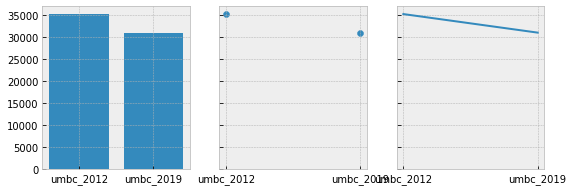

In [250]:
data = {'umbc_2012': separate_organization_2012(360231)['ytd_gross_earnings'].mean(), 'umbc_2019': separate_organization(360231)['ytd_gross_earnings'].mean()}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)

### 2012 UMCP Data

In [217]:
separate_organization_2012(360222)

,first_name,last_name,agency,organization,annual_salary,ytd_gross_earnings
112787,DANIEL,OBERSKI,360222,UNIVERSITY OF MARYLAND,0,2000
112788,TRYGVE,KARPER,360222,UNIVERSITY OF MARYLAND,0,1000
112789,XIANBO,LIU,360222,UNIVERSITY OF MARYLAND,26000,8000
112790,RONDON,MENDONCA-NETO,360222,UNIVERSITY OF MARYLAND,0,4000
112791,ULRICH,ZIEGLTRUM,360222,UNIVERSITY OF MARYLAND,0,3000
...,...,...,...,...,...,...
127888,VLADIMIR,MANDIC,360222,UNIVERSITY OF MARYLAND,0,2000
127889,XIQUN,CHEN,360222,UNIVERSITY OF MARYLAND,26000,12000
127890,FRENEL,CADET,360222,UNIVERSITY OF MARYLAND,0,13000
127892,DANILO,CICCONE MIGUEL,360222,UNIVERSITY OF MARYLAND,24000,27000


In [222]:
umcp_2012 = separate_organization_2012(360222).iloc[:, 3:].describe() 
umcp_2012

,annual_salary,ytd_gross_earnings
count,14678.000000,14678.000000
mean,44106.213381,47242.471726
std,47213.626047,47469.471112
min,0.000000,1000.000000
25%,0.000000,12000.000000
50%,38000.000000,37000.000000
75%,66000.000000,65000.000000
max,450000.000000,985000.000000


### Comparison of UMCP between 2012 and 2019

In [246]:
print("UMCP's annual mean salary in 2012: \n$", separate_organization_2012(360222)['ytd_gross_earnings'].mean())
print("UMCP's annual mean salary in 2019 \n$", separate_organization(360222)['ytd_gross_earnings'].mean())

UMCP's annual mean salary in 2012: 
$ 47242.47172639324
UMCP's annual mean salary in 2019 
$ 34947.30293247243


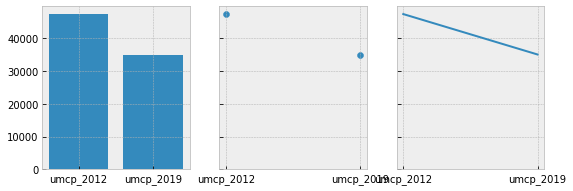

In [251]:
data_umcp = {'umcp_2012': separate_organization_2012(360222)['ytd_gross_earnings'].mean(), 'umcp_2019': separate_organization(360222)['ytd_gross_earnings'].mean()}
names = list(data_umcp.keys())
values = list(data_umcp.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)